In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
Airlines = pd.read_excel('D:/DS Assignments/Forecasting/Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)

In [3]:
Airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


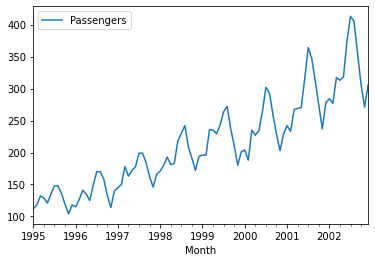

In [4]:
# line plot of time series
from matplotlib import pyplot
Airlines.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

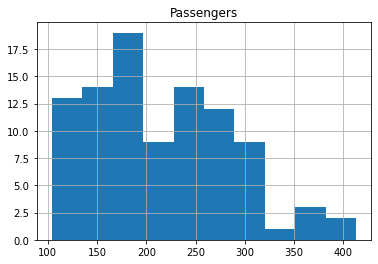

In [5]:
Airlines.hist()

<AxesSubplot:ylabel='Density'>

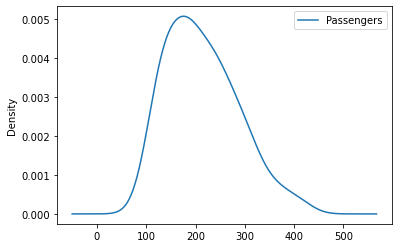

In [6]:
Airlines.plot(kind='kde')

In [7]:
# separate out a validation dataset
split_point = len(Airlines) - 25
dataset, validation = Airlines[0:split_point], Airlines[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', header=False)
validation.to_excel('validation.xlsx', header=False)

Dataset 71, Validation 25


In [8]:
#### Persistence/ Base model

In [9]:
# evaluate a persistence model
from pandas import read_excel
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_excel('dataset.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.60)
train, test = X[0:train_size], X[train_size:]

In [10]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [11]:
#### ARIMA Hyperparameters

In [12]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_excel
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [13]:
#Grid Search for p,d,q values

In [14]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [15]:
# load dataset
train = read_excel('dataset.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=70.189
ARIMA(0, 0, 1) RMSE=40.830
ARIMA(0, 0, 4) RMSE=30.801
ARIMA(0, 1, 0) RMSE=24.899
ARIMA(0, 1, 1) RMSE=24.376
ARIMA(0, 1, 2) RMSE=26.160
ARIMA(0, 1, 3) RMSE=23.801
ARIMA(0, 1, 4) RMSE=22.926
ARIMA(0, 2, 0) RMSE=30.364
ARIMA(0, 2, 1) RMSE=25.520
ARIMA(0, 2, 2) RMSE=24.893
ARIMA(0, 2, 3) RMSE=27.446
ARIMA(0, 2, 4) RMSE=25.075
ARIMA(1, 0, 0) RMSE=24.929
ARIMA(1, 0, 1) RMSE=24.134
ARIMA(1, 0, 2) RMSE=568.079
ARIMA(1, 1, 0) RMSE=24.552
ARIMA(1, 2, 0) RMSE=29.066
ARIMA(2, 0, 0) RMSE=24.314
ARIMA(2, 1, 0) RMSE=24.727
ARIMA(2, 2, 0) RMSE=27.379
ARIMA(3, 0, 0) RMSE=24.494
ARIMA(3, 0, 1) RMSE=23.779
ARIMA(3, 1, 0) RMSE=25.525
ARIMA(3, 2, 0) RMSE=28.385
ARIMA(4, 0, 0) RMSE=25.255
ARIMA(4, 1, 0) RMSE=25.476
ARIMA(4, 2, 0) RMSE=28.755
ARIMA(4, 2, 1) RMSE=26.059
Best ARIMA(0, 1, 4) RMSE=22.926


In [16]:
#### Build Model based on the optimized values

In [17]:
# save finalized model to file
from pandas import read_excel
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [18]:
# load data
train = read_excel('dataset.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

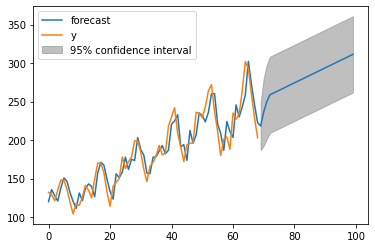

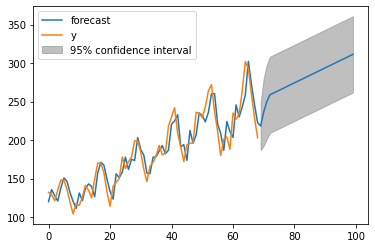

In [22]:
# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()
forecast=model_fit.forecast(steps=25)[0]
model_fit.plot_predict(1, 100)

In [23]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   69
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -290.831
Method:                       css-mle   S.D. of innovations             15.988
Date:                Tue, 24 Aug 2021   AIC                            593.661
Time:                        16:23:52   BIC                            607.066
Sample:                             1   HQIC                           598.979
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9474      0.268      7.265      0.000       1.422       2.473
ma.L1.D.y     -0.0045      0.123     -0.037      0.971      -0.246       0.237
ma.L2.D.y     -0.3784      0.118     -3.210      0.0

In [24]:
#Error on the test data
val=pd.read_excel('validation.xlsx',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

50.969790637825135

In [25]:
#### Combine train and test data and build final model

In [26]:
# fit model
data = read_excel('D:/DS Assignments/Forecasting/Airlines+Data.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [27]:
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit()

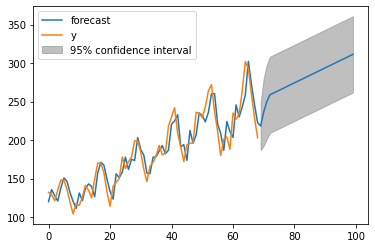

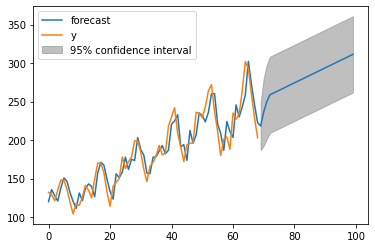

In [28]:
forecast=model_fit.forecast(steps=25)[0]
model_fit.plot_predict(1,100)

In [29]:
forecast

array([218.24684146, 236.76990444, 249.84683476, 258.80501096,
       260.75239619, 262.69978141, 264.64716663, 266.59455185,
       268.54193707, 270.48932229, 272.43670751, 274.38409273,
       276.33147796, 278.27886318, 280.2262484 , 282.17363362,
       284.12101884, 286.06840406, 288.01578928, 289.9631745 ,
       291.91055973, 293.85794495, 295.80533017, 297.75271539,
       299.70010061])